In [2]:
import sklearn
import numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [3]:
#load the csv Data
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#deleting id Coloum
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#display basic stats of data
df.describe()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
#display no of samples on each class or each species
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [8]:
##preprocessing dataset
#check null values 
df.isnull().sum()


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: >

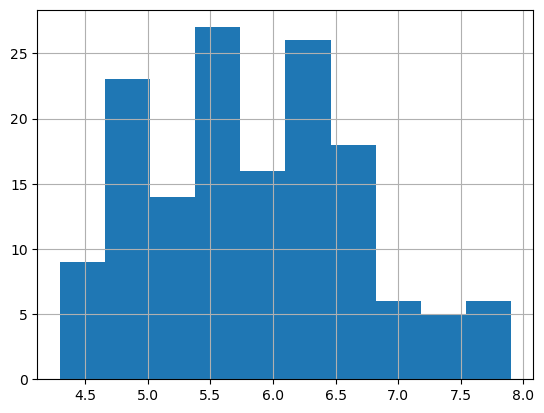

In [9]:
## data analysis 
df['SepalLengthCm'].hist()

<Axes: >

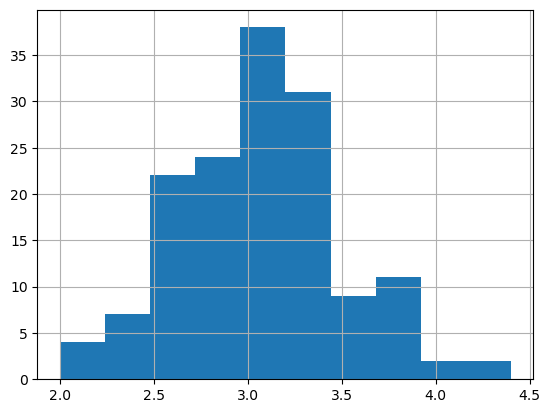

In [10]:
df['SepalWidthCm'].hist()

<Axes: >

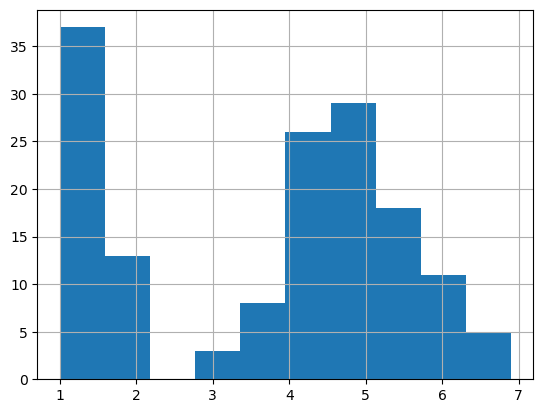

In [11]:
df['PetalLengthCm'].hist()

<Axes: >

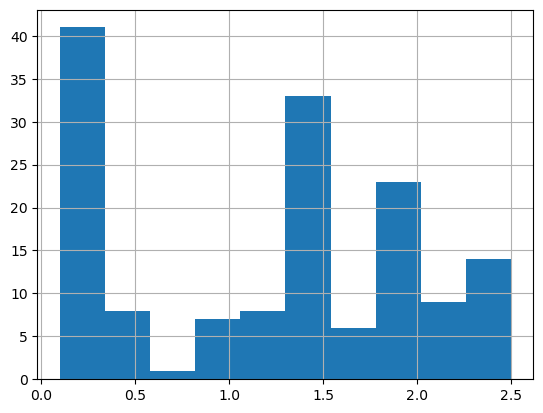

In [12]:
df['PetalWidthCm'].hist()

In [13]:
# create List of colors and class labels 
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

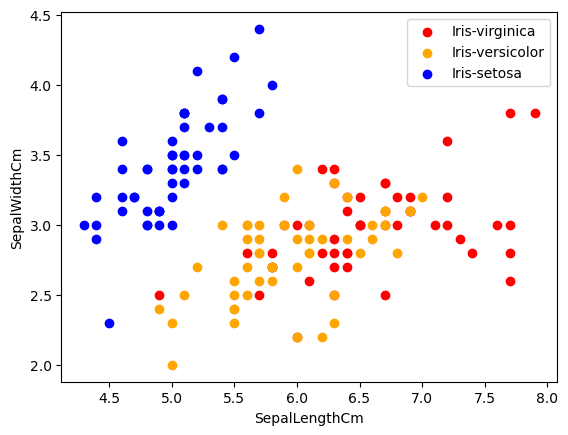

In [14]:
for i in range(3):
    #filter data on each class
    x= df[df['Species'] == species[i]]
    # plot the scatter plot 
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'], c= colors[i],label= species[i])
plt.xlabel("SepalLengthCm") 
plt.ylabel("SepalWidthCm") 
plt.legend()

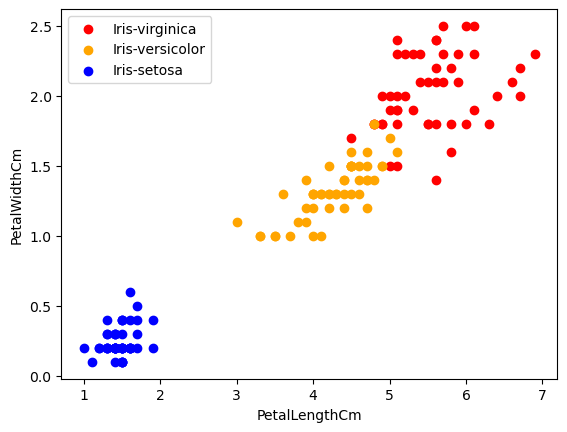

In [15]:
for i in range(3):
    #filter data on each class
    x= df[df['Species'] == species[i]]
    # plot the scatter plot 
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'], c= colors[i],label= species[i])
plt.xlabel("PetalLengthCm") 
plt.ylabel("PetalWidthCm") 
plt.legend()

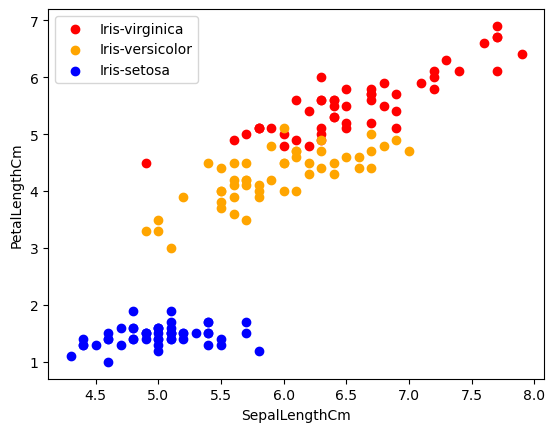

In [16]:
for i in range(3):
    #filter data on each class
    x= df[df['Species'] == species[i]]
    # plot the scatter plot 
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'], c= colors[i],label= species[i])
plt.xlabel("SepalLengthCm") 
plt.ylabel("PetalLengthCm") 
plt.legend()

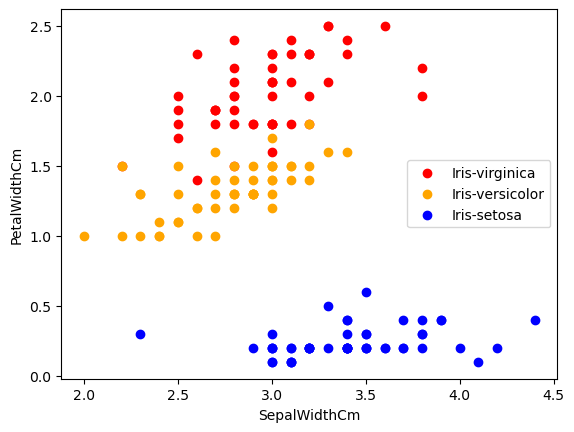

In [17]:
for i in range(3):
    #filter data on each class
    x= df[df['Species'] == species[i]]
    # plot the scatter plot 
    plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'], c= colors[i],label= species[i])
plt.xlabel("SepalWidthCm") 
plt.ylabel("PetalWidthCm") 
plt.legend()

In [18]:
##CORRELATION MATRIX
#display the correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
numeric_df.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


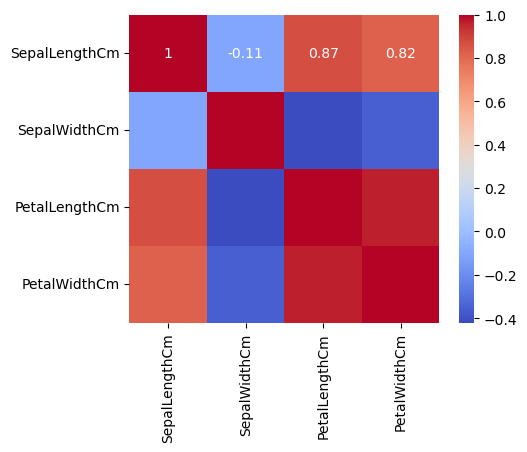

In [19]:
corr= numeric_df.corr()
#plot the heat map
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')
plt.show()

In [20]:
!pip install --upgrade scikit-learn

In [21]:
##MODEL TRAINING AND TESTING 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

# Input and output data
X = df.drop(columns=['Species'])
Y = df['Species']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)


In [22]:
!pip list --outdated


Package                           Version      Latest      Type
--------------------------------- ------------ ----------- -----
aiobotocore                       2.7.0        2.12.3      wheel
aiohttp                           3.9.3        3.9.5       wheel
aioitertools                      0.7.1        0.11.0      wheel
aiosignal                         1.2.0        1.3.1       wheel
alabaster                         0.7.12       0.7.16      wheel
altair                            5.0.1        5.3.0       wheel
anaconda-cloud-auth               0.1.4        0.5.1       wheel
anyio                             4.2.0        4.3.0       wheel
archspec                          0.2.1        0.2.4       wheel
argon2-cffi                       21.3.0       23.1.0      wheel
arrow                             1.2.3        1.3.0       wheel
astroid                           2.14.2       3.2.0       wheel
astropy                           5.3.4        6.1.0       wheel
asttokens                 

In [23]:
#logidtic regression
model = LogisticRegression()
model.fit(x_train.values, y_train)
print("Logistic Regression Accuracy:", model.score(x_test, y_test)*100)


Logistic Regression Accuracy: 95.55555555555556


In [24]:
#model training 
model.fit(x_train.values, y_train.values)

LogisticRegression()

In [26]:
#K-nearest neighbors
model = KNeighborsClassifier()
model.fit(x_train.values, y_train.values)
print("K-nearest neighbors Accuracy:", model.score(x_test, y_test)*100)

K-nearest neighbors Accuracy: 95.55555555555556


In [27]:
model.fit(x_train.values, y_train.values)

KNeighborsClassifier()

In [28]:
print("Accuracy:", model.score(x_test, y_test)*100)

Accuracy: 95.55555555555556


In [29]:
#decision tree
model= DecisionTreeClassifier()
model.fit(x_train.values, y_train.values)
print("Decision tree Accuracy:", model.score(x_test, y_test)*100)

Decision tree Accuracy: 95.55555555555556


In [30]:
model.fit(x_train.values, y_train.values)


DecisionTreeClassifier()

In [31]:
print("Accuracy:", model.score(x_test, y_test)*100)

Accuracy: 95.55555555555556


In [32]:
#save the model 
import pickle
filename= 'saved_model.sav'
pickle.dump(model, open(filename,'wb'))

In [33]:
import pickle

In [34]:
#save the updated model
filename='saved_model.sav'
try:
    with open(filename,'wb') as file:
        pickle.dump(model,file)
    print("model saved successfully")
except Exception as e:
    print("Error saving the model:{e}")

model saved successfully


In [35]:
load_model = pickle.load(open(filename,'rb'))

In [39]:
load_model.predict([[6.0,2.2,4.0,1.0]])

array(['Iris-versicolor'], dtype=object)

In [40]:
x_test.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
145,6.7,3.0,5.2,2.3
97,6.2,2.9,4.3,1.3
52,6.9,3.1,4.9,1.5
64,5.6,2.9,3.6,1.3
7,5.0,3.4,1.5,0.2


In [44]:
load_model.predict([[0,0,0,0]])

array(['Iris-setosa'], dtype=object)